# <font color=#4863A0>Model Training</font>

## <font color=#4863A0>1. Import Data and Requiered Packages</font>

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

*<font color=#4863A0>Read CSV Data and Show the top 10 records</font>*

In [2]:
df = pd.read_csv("./data/StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## <font color=#4863A0>2. Preparing X and Y variables</font>

In [5]:
X = df.drop(columns=["math score"], axis=1)
y = df["math score"]

In [3]:
category_columns = df.select_dtypes(include=[object]).columns
for col in category_columns:
    print(f"Categories in '{col}':")
    print(df[f'{col}'].unique(),'\n')

Categories in 'gender':
['female' 'male'] 

Categories in 'race/ethnicity':
['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental level of education':
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch':
['standard' 'free/reduced'] 

Categories in 'test preparation course':
['none' 'completed'] 



### <font color=#4863A0>2.1. Create Column Transformer with 3 types of transformers</font>

In [6]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Retrieve categorical and numerical columns names
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Create objects to transform the data
oh_transformer = OneHotEncoder()
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [7]:
# transform 
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

## <font color=#4863A0>3. Separate dataset into train and test</font>

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## <font color=#4863A0>4. Modeling</font>

### <font color=#4863A0>4.1. Create and Evaluate Function to Give All Metrics After Model Training</font>

In [18]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

### <font color=#4863A0>4.2. Create, Train and Evaluate Models</font>

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(ccp_alpha=0.007),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=300),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3355
- Mean Absolute Error: 4.2573
- R2 Score: 0.8755
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2991
- Mean Absolute Error: 4.1920
- R2 Score: 0.8791


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5972
- Mean Absolute Error: 5.1811
- R2 Score: 0.8096
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.1312
- Mean Absolute Error: 4.9571
- R2 Score: 0.8381


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3252
- Mean Absolute Error: 4.2532
- R2 Score: 0.8760
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3284
- Mean Absolute Error: 4.1930
- R2 Score: 0.8777


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8783
- Mean Absolute Error: 4.6498
- R2 Score: 0.8489
-----------------------

### <font color=#4863A0>4.3. Results</font>

In [33]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.879065
2,Ridge,0.877720
7,CatBoosting Regressor,0.860175
5,Random Forest Regressor,0.859020
8,AdaBoost Regressor,0.851368
1,Lasso,0.838098
6,XGBRegressor,0.834526
3,K-Neighbors Regressor,0.796800
4,Decision Tree,0.741725


* The best model is linear regression

### <font color=#4863A0>5. Linear Regression</font>

In [34]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.91


* The model predict values close to real value

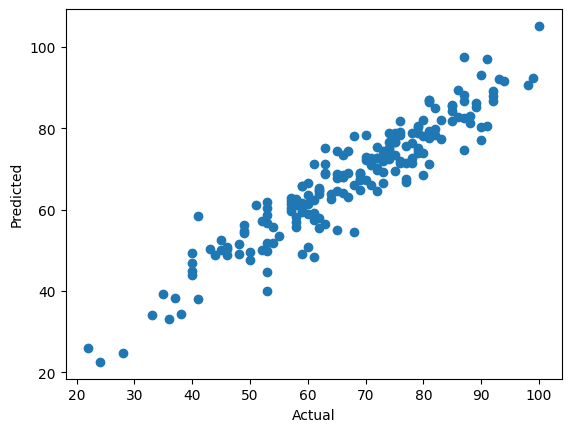

In [35]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

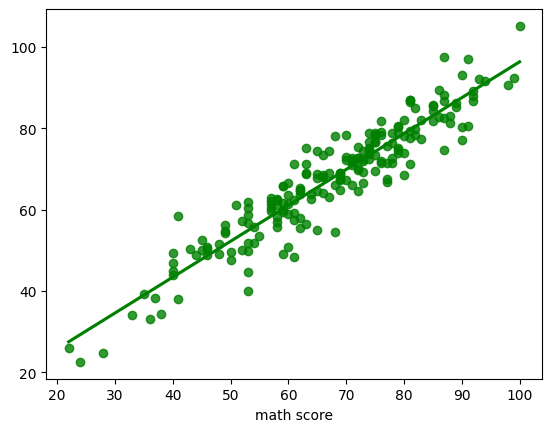

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

### <font color=#4863A0>6. Difference Between Actual and Predicted Values</font>

In [38]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
131,53,39.87500,13.12500
203,57,62.06250,-5.06250
50,53,61.84375,-8.84375
585,65,68.81250,-3.81250
138,59,59.90625,-0.90625
...,...,...,...
79,62,64.71875,-2.71875
177,71,66.15625,4.84375
657,69,68.93750,0.06250
210,80,78.00000,2.00000
